[[ 5.07793064]]
[ 25.21002155]
0.878262470366


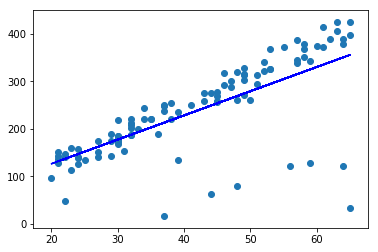

[(17, array([ 321.08523899])), (64, array([ 227.49536784])), (33, array([ 196.58566667])), (51, array([ 195.69834202])), (88, array([ 188.4581143])), (80, array([ 188.04935614])), (59, array([ 184.57280156])), (68, array([ 89.22397446])), (24, array([ 88.83562165])), (86, array([ 79.39107925])), (46, array([ 77.87046551])), (9, array([ 73.95521804])), (84, array([ 70.91090716])), (82, array([ 69.28252898])), (27, array([ 66.37859364])), (47, array([ 59.02051758])), (83, array([ 58.26304975])), (52, array([ 52.84136738])), (16, array([ 50.5069166])), (10, array([ 49.67490995])), (6, array([ 49.19921993])), (48, array([ 46.94727303])), (2, array([ 45.93320969])), (19, array([ 44.39761907])), (85, array([ 41.39100187])), (41, array([ 40.41265628])), (63, array([ 39.09374272])), (40, array([ 38.91476278])), (69, array([ 37.66744719])), (42, array([ 36.16218486])), (66, array([ 35.76666409])), (31, array([ 34.60744289])), (21, array([ 33.43864239])), (5, array([ 32.22658686])), (79, array([

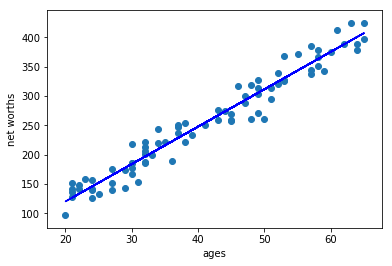

In [2]:
# %load outlier_removal_regression.py
#!/usr/bin/python

import random
import numpy
import matplotlib.pyplot as plt
import pickle

from outlier_cleaner import outlierCleaner


### load up some practice data with outliers in it
ages = pickle.load( open("practice_outliers_ages.pkl", "r") )
net_worths = pickle.load( open("practice_outliers_net_worths.pkl", "r") )



### ages and net_worths need to be reshaped into 2D numpy arrays
### second argument of reshape command is a tuple of integers: (n_rows, n_columns)
### by convention, n_rows is the number of data points
### and n_columns is the number of features
ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))
from sklearn.cross_validation import train_test_split
ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(ages, net_worths, test_size=0.1, random_state=42)

### fill in a regression here!  Name the regression object reg so that
### the plotting code below works, and you can see what your regression looks like



from sklearn.linear_model import LinearRegression 
reg=LinearRegression()
reg.fit(ages_train,net_worths_train)
print reg.coef_
print reg.intercept_
print reg.score(ages_test,net_worths_test)

try:
    plt.plot(ages, reg.predict(ages), color="blue")
except NameError:
    pass
plt.scatter(ages, net_worths)
plt.show()


### identify and remove the most outlier-y points
cleaned_data = []
try:
    predictions = reg.predict(ages_train)
    cleaned_data = outlierCleaner( predictions, ages_train, net_worths_train )
except NameError:
    print "your regression object doesn't exist, or isn't name reg"
    print "can't make predictions to use in identifying outliers"







### only run this code if cleaned_data is returning data
if len(cleaned_data) > 0:
    ages, net_worths, errors = zip(*cleaned_data)
    ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
    net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))

    ### refit your cleaned data!
    try:
        reg.fit(ages, net_worths)
        print reg.coef_
        print reg.intercept_
        print reg.score(ages_test,net_worths_test)
        plt.plot(ages, reg.predict(ages), color="blue")
    except NameError:
        print "you don't seem to have regression imported/created,"
        print "   or else your regression object isn't named reg"
        print "   either way, only draw the scatter plot of the cleaned data"
    plt.scatter(ages, net_worths)
    plt.xlabel("ages")
    plt.ylabel("net worths")
    plt.show()


else:
    print "outlierCleaner() is returning an empty list, no refitting to be done"



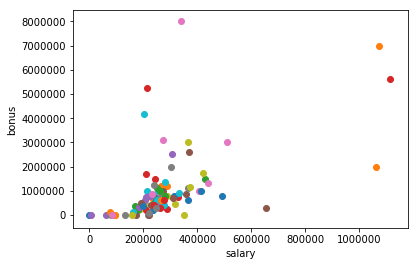

In [11]:
# %load enron_outliers.py
#!/usr/bin/python

import pickle
import sys
import matplotlib.pyplot
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit


### read in data dictionary, convert to numpy array
data_dict = pickle.load( open("../final_project/final_project_dataset.pkl", "r") )
data_dict.pop("TOTAL",0)
features = ["salary", "bonus"]
data = featureFormat(data_dict, features)

### your code below
for point in data:
    salary = point[0]
    bonus = point[1]
    matplotlib.pyplot.scatter( salary, bonus )

matplotlib.pyplot.xlabel("salary")
matplotlib.pyplot.ylabel("bonus")
matplotlib.pyplot.show()


